Exercício 1

In [148]:
#bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.pyplot as plt

In [149]:
#função para integração das funções distribuição pelo método dos retângulos
def integracao(funcao,a, b):
  t = np.linspace(a,b,10000)
  largura = t[1]-t[0]
  integral = np.cumsum(funcao(t[:-1]))*largura
  return integral[len(integral) - 1]


In [150]:
#inicialização dos valores mínimos, máximos das funções
#inicialização dos valores de Xmin e Xmax 
distribuicao = np.array([[0,300],
                         [300,300],
                         [400,400]])
comprimentos_distribuicao = np.array([[0,3],
                                      [3,5],
                                      [5,10]])


In [77]:
#determinacao das respectivas funcoes lineares
#calculo da força resultante da distribuicao integrando
#obtencao da posicao da forca resultante (x_barra)}

def reacoesDeApoio(dist,comp_dist):
  funcoes = list()
  coef = list()
  Forca_resultante = 0
  Momento = 0
  for i in range(0, len(dist)):
    coef.append((dist[i][1] - dist[i][0]) / (comp_dist[i][1] - comp_dist[i][0]))
    funcoes.append(lambda x, i = i: (coef[i]*(x - comp_dist[i][0]) + dist[i][0]))
    Forca_resultante += integracao(funcoes[i],comp_dist[i][0],comp_dist[i][1])
    Momento += integracao(lambda x : x*funcoes[i](x),comp_dist[i][0],comp_dist[i][1])
    
  x_barra = Momento / Forca_resultante
  Forca_resultante = round(Forca_resultante)
  print(f"Força resultante: {Forca_resultante}kN")
  print(f"Posição da força resultante: {x_barra:.2f}m")
  
  comprimento_maximo = np.max(comp_dist[:, 1])

  Vb = Momento / comprimento_maximo
  x = sp.symbols('x')
  Va = Forca_resultante - Vb

  return round(Va),round(Vb)

Exercício 2

In [151]:
#Configura o tipo da função
#Acha as reações de apoio e aplica na condição de contorno para a EDO dv/dx = -w(x)
distribuicao2 = np.array([[15,25]])
comprimento_distribuicao2 = np.array([[0,6]])
Va,Vb = reacoesDeApoio(distribuicao2,comprimento_distribuicao2)
print(Va,Vb)
coeficiente = (distribuicao2[0][1] - distribuicao2[0][0]) / (comprimento_distribuicao2[0][1] - comprimento_distribuicao2[0][0])
funcao = lambda x : (coeficiente*(x - comprimento_distribuicao2[0][0]) + distribuicao2[0][0]) 
x = sp.symbols('x')
v = sp.Function('v')
eq_dif = sp.Eq(sp.diff(v(x),x) + funcao(x),0)
cortante = sp.dsolve(eq_dif,ics = {v(0) : Va})
funcao_cortante = sp.lambdify(x, cortante.rhs, "numpy")
cortante

Força resultante: 120kN
Posição da força resultante: 3.25m
55 65


Eq(v(x), -0.833333333333333*x**2 - 15.0*x + 55)

[-21.1243556529821, 3.12435565298214]


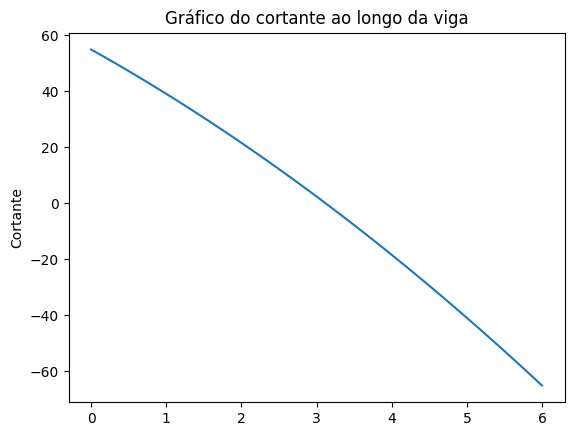

In [152]:
x_plot = np.linspace(0,6)
y_plot = funcao_cortante(x_plot)

#onde o cortante se anula
eq = sp.Eq(funcao_cortante(x),0)
X = sp.solve(eq)
print(X)

#gráfico do cortante
plt.title("Gráfico do cortante ao longo da viga")
plt.ylabel("Cortante")
plt.plot(x_plot,y_plot)

In [154]:
#acha a eq do momento fletor baseado na EDO dM/dx = V(x)

M = sp.Function('M')
eq = sp.Eq(sp.diff(M(x),x) - funcao_cortante(x),0)
momento_fletor = sp.dsolve(eq,ics = {M(0) : 0})
funcao_momento = sp.lambdify(x,momento_fletor.rhs,"numpy")
momento_fletor


Eq(M(x), -0.277777777777778*x**3 - 7.5*x**2 + 55.0*x)

[-21.1243556529821, 3.12435565298214]


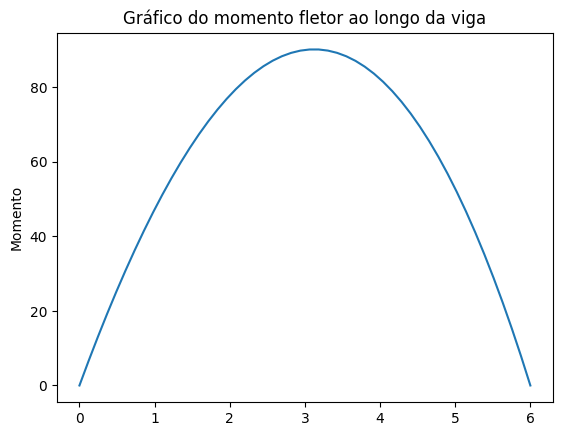

In [155]:
x_plot = np.linspace(0,6)
y_plot = funcao_momento(x_plot)

#onde o momento é máximo
eq = sp.Eq(sp.diff(funcao_momento(x),x),0)
X = sp.solve(eq)
print(X)

plt.title("Gráfico do momento fletor ao longo da viga")
plt.ylabel("Momento")
plt.plot(x_plot,y_plot)